# Jump to middle of file for quick data import from zip_codes.csv
May encounter errors with modules or missing files if running every cell

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import geopandas
import fiona
from shapely.geometry import Point

# Initial data import and cleaning
Data gathered from https://data.cityofchicago.org/

In [2]:
path1 = "CSV/Traffic_Crashes_-_Crashes.csv"
path2 = "CSV/Traffic_Crashes_-_Vehicles.csv"

In [3]:
crash_data = pd.read_csv(path1)
crash_data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [4]:
crash_data["MOST_SEVERE_INJURY"].unique()

array(['REPORTED, NOT EVIDENT', 'NO INDICATION OF INJURY',
       'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', nan, 'FATAL'],
      dtype=object)

In [5]:
crash_data.keys()

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [6]:
crash_data_df = crash_data.loc[:, ["CRASH_RECORD_ID", "CRASH_DATE", "POSTED_SPEED_LIMIT", "TRAFFIC_CONTROL_DEVICE", 
                                   "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION",
                                   "FIRST_CRASH_TYPE" ,"TRAFFICWAY_TYPE", "LANE_CNT", "ROADWAY_SURFACE_COND",
                                   "ROAD_DEFECT", "CRASH_TYPE", "DAMAGE", "PRIM_CONTRIBUTORY_CAUSE", "SEC_CONTRIBUTORY_CAUSE",
                                   "STREET_NO","STREET_DIRECTION", "STREET_NAME", "MOST_SEVERE_INJURY", 
                                   "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", 
                                   "INJURIES_NON_INCAPACITATING", 
                                   'INJURIES_NO_INDICATION', 
                                   'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE', 'LOCATION']]
crash_data_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_NO_INDICATION,CRASH_DAY_OF_WEEK,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,1.0,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,1,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,9c78af58eda319eb65e1a4d7c3f35acd0f9bda4880c9f8...,01/31/2023 03:08:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,3,41.800703,-87.742822,POINT (-87.742821570545 41.800703279732)
693091,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,01/31/2023 01:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498)
693092,87bce56c2695e72c8f167fae3417842ae9d005d3ebb912...,01/31/2023 06:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.967830,-87.767331,POINT (-87.767330740918 41.967829999529)
693093,5bb55bf54b46636305a05f340366792d5b41b2e6b3d0d3...,01/28/2023 06:35:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,DARKNESS,PEDESTRIAN,ONE-WAY,NaN,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,7,41.968866,-87.760116,POINT (-87.760116218932 41.968865724049)


In [7]:
crash_data_df = crash_data_df.rename(columns ={"CRASH_DATE" : "Crash Date",
                                               "CRASH_RECORD_ID" : "Crash Record ID",
                                               "POSTED_SPEED_LIMIT" : "Posted Speed Limit",
                                               "TRAFFIC_CONTROL_DEVICE": "Traffic Control Device",
                                               "DEVICE_CONDITION" : "Device Condition",
                                               "WEATHER_CONDITION": "Weather Condition",
                                               "LIGHTING_CONDITION" : "Lighting Condition",
                                               "FIRST_CRASH_TYPE" : "Crash Type",
                                               "TRAFFICWAY_TYPE": "Street Type", 
                                               "LANE_CNT" : "Number of Lanes", 
                                               "ROADWAY_SURFACE_COND": "Roadway Condition",
                                               "ROAD_DEFECT" : "Road Defect", 
                                               "CRASH_TYPE" : "Severity", 
                                               "DAMAGE": "Damages", 
                                               "PRIM_CONTRIBUTORY_CAUSE": "Primary Contributory Cause", 
                                               "SEC_CONTRIBUTORY_CAUSE" : "Secondary Contributory Cause",
                                               "STREET_NO" : "Street Number",
                                               "STREET_DIRECTION" : "Street Direction", 
                                               "STREET_NAME": "Street Name", 
                                               "MOST_SEVERE_INJURY": "Injury Type", 
                                               "INJURIES_TOTAL": "Total Injuries", 
                                               "INJURIES_FATAL" : "Fatal Injuries", 
                                               "INJURIES_INCAPACITATING" : "Severe Injuries", 
                                               "INJURIES_NON_INCAPACITATING" : "Minor Injuries", 
                                               "INJURIES_NO_INDICATION" : "No Injuries Recorded", 
                                               "CRASH_DAY_OF_WEEK": "Day of Week",
                                               "LATITUDE": "Latitude", 
                                               "LONGITUDE": "Longitude",
                                               "LOCATION" : "Location",
                                              })
crash_data_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,...,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,1.0,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,1,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,9c78af58eda319eb65e1a4d7c3f35acd0f9bda4880c9f8...,01/31/2023 03:08:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,3,41.800703,-87.742822,POINT (-87.742821570545 41.800703279732)
693091,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,01/31/2023 01:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498)
693092,87bce56c2695e72c8f167fae3417842ae9d005d3ebb912...,01/31/2023 06:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,NaN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.967830,-87.767331,POINT (-87.767330740918 41.967829999529)
693093,5bb55bf54b46636305a05f340366792d5b41b2e6b3d0d3...,01/28/2023 06:35:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,DARKNESS,PEDESTRIAN,ONE-WAY,NaN,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,7,41.968866,-87.760116,POINT (-87.760116218932 41.968865724049)


In [8]:
vehicle_data = pd.read_csv(path2)
vehicle_data
# Sunday is 1

C:\Users\Connor Thomas\AppData\Local\Temp\ipykernel_8740\1644759922.py:1: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_data = pd.read_csv(path2)


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412211,1508506,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,1,DRIVER,NaN,1434178.0,NaN,SCION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412212,1508507,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,2,DRIVER,NaN,1434196.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412213,1510144,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,JG124880,01/21/2023 09:00:00 PM,1,DRIVER,NaN,1435762.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412214,1510145,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,JG124880,01/21/2023 09:00:00 PM,2,DRIVER,2.0,1435763.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
vehicle_data.keys()

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

In [10]:
vehicle_data_df = vehicle_data.loc[:,['CRASH_RECORD_ID','CRASH_DATE',
                                      'NUM_PASSENGERS','MAKE','MODEL',
                                      'VEHICLE_YEAR','VEHICLE_TYPE','TRAVEL_DIRECTION',
                                      'MANEUVER','OCCUPANT_CNT','EXCEED_SPEED_LIMIT_I']]
vehicle_data_df = vehicle_data_df.rename(columns={'CRASH_RECORD_ID':"Crash Record ID",
                                                    'CRASH_DATE':"Crash Date",
                                                    'NUM_PASSENGERS':"Number of Passengers",
                                                    'MAKE':"Make",
                                                    'MODEL':"Model",
                                                    'VEHICLE_YEAR':"Vehicle Year",
                                                    'VEHICLE_TYPE':"Vehicle Type",
                                                    'TRAVEL_DIRECTION':"Travel Direction",
                                                    'MANEUVER':"Maneuver",
                                                    'OCCUPANT_CNT':"Number of Occupants",
                                                    'EXCEED_SPEED_LIMIT_I':"Exceeded Speed Limit"})
vehicle_data_df

,Crash Record ID,Crash Date,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,NaN,INFINITI,UNKNOWN,2017.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,HONDA,CIVIC,2016.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,TOYOTA,YARIS,2010.0,UNKNOWN/NA,N,PARKED,0.0,NaN
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,2008.0,UNKNOWN/NA,N,PARKED,0.0,NaN
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,NaN,BUICK,ENCORE,NaN,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1412211,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,SCION,TC,2008.0,PASSENGER,N,CHANGING LANES,1.0,NaN
1412212,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,JEEP,CHEROKEE,2018.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN
1412213,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,NaN,DODGE,DART,2016.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
1412214,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,2.0,TOYOTA,RAV4,2017.0,PASSENGER,N,SLOW/STOP IN TRAFFIC,3.0,NaN


In [11]:
chicago_df = pd.merge(crash_data_df, vehicle_data_df, on="Crash Record ID")
pd.options.display.max_columns = 500
chicago_df

,Crash Record ID,Crash Date_x,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Crash Date_y,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,NaN
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),07/15/2022 12:45:00 AM,NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,87bce56c2695e72c8f167fae3417842ae9d005d3ebb912...,01/31/2023 06:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,NaN,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,4801,N,CENTRAL AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.967830,-87.767331,POINT (-87.767330740918 41.967829999529),01/31/2023 06:30:00 PM,1.0,FORD,TAURUS,2003.0,PASSENGER,UNKNOWN,PARKED,1.0,NaN
1412210,5bb55bf54b46636305a05f340366792d5b41b2e6b3d0d3...,01/28/2023 06:35:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,DARKNESS,PEDESTRIAN,ONE-WAY,NaN,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,5315,W,AINSLIE ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,7,41.968

In [12]:
chicago_df = chicago_df.drop(columns=["Crash Date_y"])

In [13]:
chicago_df = chicago_df.rename(columns={ "Crash Date_x" : "Crash Date"})

In [14]:
newcol = []
newcol2 = []
for date in chicago_df["Crash Date"]:
    newcol.append(date.split()[0])
    newcol2.append((date.split()[1],date.split()[2]))
chicago_df["Date"] = newcol
chicago_df["Time"] = newcol2
chicago_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,NaN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,NaN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,NaN,07/15/2022,"(12:45:00, AM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,87bce56c2695e72c8f167fae3417842ae9d005d3ebb912...,01/31/2023 06:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,NaN,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,4801,N,CENTRAL AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,3,41.967830,-87.767331,POINT (-87.767330740918 41.967829999529),1.0,FORD,TAURUS,2003.0,PASSENGER,UNKNOWN,PARKED,1.0,NaN,01/31/2023,"(06:30:00, PM)"
1412210,5bb55bf54b46636305a05f340366792d5b41b2e6b3d0d3...,01/28/2023 06:35:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,DARKNESS,PEDESTRIAN,ONE-WAY,NaN,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,5315,W,AINSLIE ST,"REPORTED, NOT EVIDENT"

In [15]:
chicago_df.columns

Index(['Crash Record ID', 'Crash Date', 'Posted Speed Limit',
       'Traffic Control Device', 'Device Condition', 'Weather Condition',
       'Lighting Condition', 'Crash Type', 'Street Type', 'Number of Lanes',
       'Roadway Condition', 'Road Defect', 'Severity', 'Damages',
       'Primary Contributory Cause', 'Secondary Contributory Cause',
       'Street Number', 'Street Direction', 'Street Name', 'Injury Type',
       'Total Injuries', 'Fatal Injuries', 'Severe Injuries', 'Minor Injuries',
       'No Injuries Recorded', 'Day of Week', 'Latitude', 'Longitude',
       'Location', 'Number of Passengers', 'Make', 'Model', 'Vehicle Year',
       'Vehicle Type', 'Travel Direction', 'Maneuver', 'Number of Occupants',
       'Exceeded Speed Limit', 'Date', 'Time'],
      dtype='object')

In [16]:
replace_df = chicago_df
replace_df["Number of Passengers"] = replace_df["Number of Passengers"].fillna(0)
replace_df["Exceeded Speed Limit"] = replace_df["Exceeded Speed Limit"].fillna("UNKNOWN")
replace_df["Vehicle Year"] = replace_df["Vehicle Year"].fillna("UNKNOWN")
replace_df["Number of Occupants"] = replace_df["Number of Occupants"].fillna(0)
replace_df = replace_df.replace({"Day of Week":{1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}})
replace_df = replace_df.drop(columns=["Crash Date"])
replace_df.head()

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),0.0,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),UNKNOWN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,UNKNOWN,07/15/2022,"(12:45:00, AM)"


In [17]:
print(chicago_df["Number of Occupants"].unique())
print(chicago_df["Vehicle Type"].unique())
chicago_df.loc[chicago_df["Number of Occupants"] == 60,:]

[ 2.  1.  0.  3.  5.  4.  9.  6.  7. 11.  8. 12. 36. 13. 18. 10. 28. 26.
 14. 15. 19. 30. 20. 29. 47. 16. 41. 44. 17. 21. 60. 37. 23. 99. 33. 27.
 43. 39. 22. 34. 25. 31. 24. 38. 35.]
['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'UNKNOWN/NA' nan
 'TRACTOR W/ SEMI-TRAILER' 'TRUCK - SINGLE UNIT' 'VAN/MINI-VAN' 'OTHER'
 'BUS OVER 15 PASS.' 'PICKUP' 'AUTOCYCLE' 'MOTORCYCLE (OVER 150CC)'
 'BUS UP TO 15 PASS.' 'SINGLE UNIT TRUCK WITH TRAILER'
 'OTHER VEHICLE WITH TRAILER' 'MOPED OR MOTORIZED BICYCLE'
 'TRACTOR W/O SEMI-TRAILER' 'MOTOR DRIVEN CYCLE' 'FARM EQUIPMENT'
 '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' 'ALL-TERRAIN VEHICLE (ATV)'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'SNOWMOBILE']


,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
406872,31ecf6862c691ff12d3856213b902c146b07337b42a569...,03/16/2018 10:17:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",NOT APPLICABLE,26,E,ROOSEVELT RD,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,61.0,6,41.867539,-87.626208,POINT (-87.626208480722 41.867538626623),59.0,UNKNOWN,UNKNOWN,2015.0,BUS OVER 15 PASS.,W,STRAIGHT AHEAD,60.0,UNKNOWN,03/16/2018,"(10:17:00, AM)"


In [18]:
car_df = replace_df.loc[replace_df["Vehicle Type"].isin(["PASSENGER",'SPORT UTILITY VEHICLE (SUV)',
                                                          'TRUCK - SINGLE UNIT', 'VAN/MINI-VAN',
                                                          'PICKUP'])]
print(len(car_df))
car_df.head()

1191044


,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
6,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"


In [19]:
replace_df.isna().sum()


Crash Record ID                       0
Posted Speed Limit                    0
Traffic Control Device                0
Device Condition                      0
Weather Condition                     0
Lighting Condition                    0
Crash Type                            0
Street Type                           0
Number of Lanes                 1007560
Roadway Condition                     0
Road Defect                           0
Severity                              0
Damages                               0
Primary Contributory Cause            0
Secondary Contributory Cause          0
Street Number                         0
Street Direction                      8
Street Name                           2
Injury Type                        2525
Total Injuries                     2504
Fatal Injuries                     2504
Severe Injuries                    2504
Minor Injuries                     2504
No Injuries Recorded               2504
Day of Week                           0


# IMPORTING ZIP CODE DATA FROM ARCGIS.COM

# ! ! WARNING : NEED ZIP CODE FILES AND MODULES TO CONTINUE ! !

In [20]:
# Need zip_poly.gdb file from:
#          https://www.arcgis.com/home/item.html?id=8d2012a2016e484dafaac0451f9aea24
zipcodes = geopandas.read_file("zip_poly.gdb")
print("done")

In [21]:
gf = geopandas.GeoDataFrame(car_df[["Location","Latitude","Longitude"]])
gf = gf.dropna()
gf = gf.reset_index(drop=True)
gf

,Location,Latitude,Longitude
0,POINT (-87.64120093714 41.884547224337),41.884547,-87.641201
1,POINT (-87.64120093714 41.884547224337),41.884547,-87.641201
2,POINT (-87.740659314632 41.968562453871),41.968562,-87.740659
3,POINT (-87.740659314632 41.968562453871),41.968562,-87.740659
4,POINT (-87.667997321599 41.925110815832),41.925111,-87.667997
...,...,...,...
1183973,POINT (-87.682375463794 41.968598719498),41.968599,-87.682375
1183974,POINT (-87.682375463794 41.968598719498),41.968599,-87.682375
1183975,POINT (-87.767330740918 41.967829999529),41.967830,-87.767331
1183976,POINT (-87.760116218932 41.968865724049),41.968866,-87.760116


In [22]:
geometry = []
for i in range(len(gf["Location"])):
    geometry.append(eval(gf["Location"][i].split()[0].capitalize()+gf["Location"][i].split()[1]+","+gf["Location"][i].split()[2]))
    if i % 10000 == 0:
        print(i/10000,"% of the way there!!")
#geometry

0.0 % of the way there!!
1.0 % of the way there!!
2.0 % of the way there!!
3.0 % of the way there!!
4.0 % of the way there!!
5.0 % of the way there!!
6.0 % of the way there!!
7.0 % of the way there!!
8.0 % of the way there!!
9.0 % of the way there!!
10.0 % of the way there!!
11.0 % of the way there!!
12.0 % of the way there!!
13.0 % of the way there!!
14.0 % of the way there!!
15.0 % of the way there!!
16.0 % of the way there!!
17.0 % of the way there!!
18.0 % of the way there!!
19.0 % of the way there!!
20.0 % of the way there!!
21.0 % of the way there!!
22.0 % of the way there!!
23.0 % of the way there!!
24.0 % of the way there!!
25.0 % of the way there!!
26.0 % of the way there!!
27.0 % of the way there!!
28.0 % of the way there!!
29.0 % of the way there!!
30.0 % of the way there!!
31.0 % of the way there!!
32.0 % of the way there!!
33.0 % of the way there!!
34.0 % of the way there!!
35.0 % of the way there!!
36.0 % of the way there!!
37.0 % of the way there!!
38.0 % of the way ther

In [23]:
gf["geometry"] = geometry
gf

,Location,Latitude,Longitude,geometry
0,POINT (-87.64120093714 41.884547224337),41.884547,-87.641201,POINT (-87.64120 41.88455)
1,POINT (-87.64120093714 41.884547224337),41.884547,-87.641201,POINT (-87.64120 41.88455)
2,POINT (-87.740659314632 41.968562453871),41.968562,-87.740659,POINT (-87.74066 41.96856)
3,POINT (-87.740659314632 41.968562453871),41.968562,-87.740659,POINT (-87.74066 41.96856)
4,POINT (-87.667997321599 41.925110815832),41.925111,-87.667997,POINT (-87.66800 41.92511)
...,...,...,...,...
1183973,POINT (-87.682375463794 41.968598719498),41.968599,-87.682375,POINT (-87.68238 41.96860)
1183974,POINT (-87.682375463794 41.968598719498),41.968599,-87.682375,POINT (-87.68238 41.96860)
1183975,POINT (-87.767330740918 41.967829999529),41.967830,-87.767331,POINT (-87.76733 41.96783)
1183976,POINT (-87.760116218932 41.968865724049),41.968866,-87.760116,POINT (-87.76012 41.96887)


In [147]:
zip_points = geopandas.sjoin(zipcodes,gf, how='right', )
print("done")

done


In [ ]:
zip_points

In [ ]:
#zip_points.to_csv("CSV/zipcodes.csv",index=False)

In [ ]:
zip_df = pd.DataFrame(zip_points[["ZIP_CODE","POPULATION","POP_SQMI","SQMI","Location"]])
zip_df

# ! ! END OF DANGER ZONE ! !
If you have new_zip_codes.csv then data should import properly

In [25]:
drop_df = car_df.dropna(subset=["Latitude","Longitude"])
drop_df = drop_df.reset_index(drop=True)
drop_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183973,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2013.0,PASSENGER,S,BACKING,1.0,UNKNOWN,01/31/2023,"(01:30:00, PM)"
1183974,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2022.0,PASSENGE

In [26]:
new_df = pd.read_csv("CSV/new_zip_codes.csv")
new_df

,Zip Code,Population,Population/Sq Miles,Sq Miles
0,60661.0,12120.0,36727.27,0.33
1,60661.0,12120.0,36727.27,0.33
2,60630.0,54519.0,11501.90,4.74
3,60630.0,54519.0,11501.90,4.74
4,60614.0,65725.0,19561.01,3.36
...,...,...,...,...
1183973,60625.0,75409.0,20603.55,3.66
1183974,60625.0,75409.0,20603.55,3.66
1183975,60630.0,54519.0,11501.90,4.74
1183976,60630.0,54519.0,11501.90,4.74


In [27]:
drop_df["Zip Code"] = new_df["Zip Code"]
drop_df["Population"] = new_df["Population"]
drop_df["Population/Sq Miles"] = new_df["Population/Sq Miles"]
drop_df["Sq Miles"] = new_df["Sq Miles"]
drop_df.head()

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)",60661.0,12120.0,36727.27,0.33
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)",60661.0,12120.0,36727.27,0.33
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)",60630.0,54519.0,11501.90,4.74
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)",60630.0,54519.0,11501.90,4.74
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)",60614.0,65725.0,19561.01,3.36


In [28]:
#drop_df.to_csv("CSV/zip_codes.csv",index=False)
print("done")

done


In [29]:
test_df = pd.read_csv("CSV/zip_codes.csv")
test_df

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time,Zip Code,Population,Population/Sq Miles,Sq Miles
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"('02:43:00', 'PM')",60661.0,12120.0,36727.27,0.33
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"('08:40:00', 'AM')",60630.0,54519.0,11501.90,4.74
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"('06:50:00', 'PM')",60614.0,65725.0,19561.01,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183973,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2127,W,LAWRENCE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Tuesday,41.968599,-87.682375,POINT (-87.682375463794 41.968598719498),0.0,TOYOTA,PRIUS,2013.0,PASSENGER,S,BACKING,1.0,UNKNOWN,01/31/2023,"('01:30:00', 'PM')",60625.0,75409.0,20603.55,3.66
1183974,75e7db78eda681456b61cc8bc1933925148665f7da2aca...,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,NaN,DR

In [30]:
zipgroup =  test_df.groupby(["Zip Code"])
zip_mean = zipgroup.mean()
zip_med = zipgroup.median()
zip_count = zipgroup.count()

In [31]:
zip_mean

,Posted Speed Limit,Number of Lanes,Street Number,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Latitude,Longitude,Number of Passengers,Number of Occupants,Population,Population/Sq Miles,Sq Miles
Zip Code,,,,,,,,,,,,,,,
60018.0,31.005917,3.000000,9323.627219,0.213018,0.000000,0.023669,0.065089,2.402367,41.992836,-87.883593,0.112426,1.065089,28843.0,3121.54,9.24
60068.0,29.545455,2.666667,7770.454545,0.000000,0.000000,0.000000,0.000000,2.590909,41.996621,-87.821450,0.318182,1.318182,36830.0,5052.13,7.29
60106.0,41.122449,3.333333,12216.020408,0.251701,0.000000,0.013605,0.047619,1.979592,41.957982,-87.932256,0.054422,1.047619,20062.0,2159.53,9.29
60131.0,38.557692,2.000000,11518.333333,0.346154,0.000000,0.038462,0.141026,2.282051,41.953773,-87.912467,0.153846,1.121795,17689.0,3239.74,5.46
60176.0,41.785714,5.000000,8042.714286,0.428571,0.000000,0.000000,0.178571,1.750000,41.962413,-87.884007,0.107143,1.107143,11382.0,4278.95,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60714.0,30.888717,3.357542,6285.990726,0.233385,0.001546,0.029366,0.134467,2.231839,41.998691,-87.782682,0.196291,1.191654,28772.0,4281.55,6.72
60803.0,31.358173,3.663366,8613.454327,0.144231,0.002404,0.024038,0.050481,2.418269,41.688884,-87.731877,0.209135,1.206731,21113.0,2475.15,8.53
60804.0,31.111111,4.000000,4589.000000,0.222222,0.000000,0.000000,0.000000,1.666667,41.852962,-87.739520,0.000000,1.000000,84569.0,13193.29,6.41


In [32]:
zip_mean["Severe + Fatal"] = zip_mean["Severe Injuries"] + zip_mean["Fatal Injuries"]
zip_mean

,Posted Speed Limit,Number of Lanes,Street Number,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Latitude,Longitude,Number of Passengers,Number of Occupants,Population,Population/Sq Miles,Sq Miles,Severe + Fatal
Zip Code,,,,,,,,,,,,,,,,
60018.0,31.005917,3.000000,9323.627219,0.213018,0.000000,0.023669,0.065089,2.402367,41.992836,-87.883593,0.112426,1.065089,28843.0,3121.54,9.24,0.023669
60068.0,29.545455,2.666667,7770.454545,0.000000,0.000000,0.000000,0.000000,2.590909,41.996621,-87.821450,0.318182,1.318182,36830.0,5052.13,7.29,0.000000
60106.0,41.122449,3.333333,12216.020408,0.251701,0.000000,0.013605,0.047619,1.979592,41.957982,-87.932256,0.054422,1.047619,20062.0,2159.53,9.29,0.013605
60131.0,38.557692,2.000000,11518.333333,0.346154,0.000000,0.038462,0.141026,2.282051,41.953773,-87.912467,0.153846,1.121795,17689.0,3239.74,5.46,0.038462
60176.0,41.785714,5.000000,8042.714286,0.428571,0.000000,0.000000,0.178571,1.750000,41.962413,-87.884007,0.107143,1.107143,11382.0,4278.95,2.66,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60714.0,30.888717,3.357542,6285.990726,0.233385,0.001546,0.029366,0.134467,2.231839,41.998691,-87.782682,0.196291,1.191654,28772.0,4281.55,6.72,0.030912
60803.0,31.358173,3.663366,8613.454327,0.144231,0.002404,0.024038,0.050481,2.418269,41.688884,-87.731877,0.209135,1.206731,21113.0,2475.15,8.53,0.026442
60804.0,31.111111,4.000000,4589.000000,0.222222,0.000000,0.000000,0.000000,1.666667,41.852962,-87.739520,0.000000,1.000000,84569.0,13193.29,6.41,0.000000


In [34]:
zip_med

,Posted Speed Limit,Number of Lanes,Street Number,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Latitude,Longitude,Number of Passengers,Number of Occupants,Population,Population/Sq Miles,Sq Miles
Zip Code,,,,,,,,,,,,,,,
60018.0,30.0,4.0,10255.0,0.0,0.0,0.0,0.0,2.0,41.994793,-87.882708,0.0,1.0,28843.0,3121.54,9.24
60068.0,30.0,2.0,7760.0,0.0,0.0,0.0,0.0,2.0,41.996962,-87.821380,0.0,1.0,36830.0,5052.13,7.29
60106.0,45.0,4.0,12300.0,0.0,0.0,0.0,0.0,2.0,41.958987,-87.933994,0.0,1.0,20062.0,2159.53,9.29
60131.0,45.0,1.0,11600.0,0.0,0.0,0.0,0.0,2.0,41.953766,-87.914197,0.0,1.0,17689.0,3239.74,5.46
60176.0,40.0,5.0,10301.0,0.0,0.0,0.0,0.0,2.0,41.958050,-87.886443,0.0,1.0,11382.0,4278.95,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60714.0,30.0,4.0,6383.0,0.0,0.0,0.0,0.0,2.0,41.997467,-87.787034,0.0,1.0,28772.0,4281.55,6.72
60803.0,30.0,4.0,11100.0,0.0,0.0,0.0,0.0,2.0,41.690606,-87.739333,0.0,1.0,21113.0,2475.15,8.53
60804.0,30.0,4.0,4597.0,0.0,0.0,0.0,0.0,2.0,41.851460,-87.739489,0.0,1.0,84569.0,13193.29,6.41


# Number of Crashes bar

In [35]:
zip_count["Posted Speed Limit"]

Zip Code
60018.0     169
60068.0      22
60106.0     147
60131.0     156
60176.0      28
           ... 
60714.0     647
60803.0     416
60804.0       9
60805.0      66
60827.0    2191
Name: Posted Speed Limit, Length: 76, dtype: int64

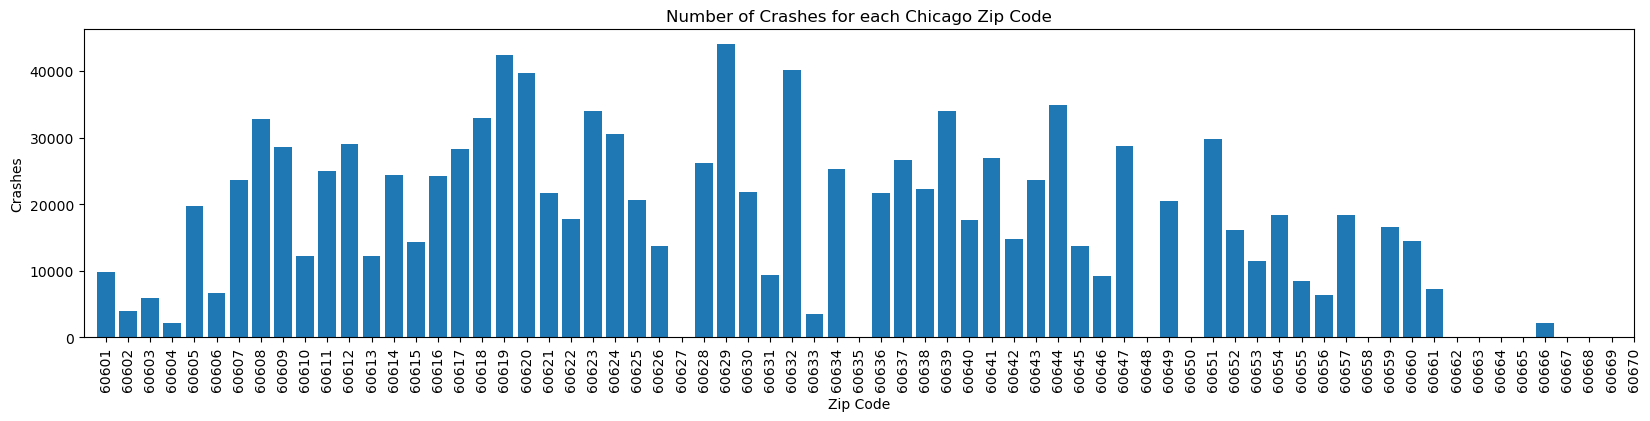

In [36]:
plt.figure(figsize=(20,4))
plt.bar(zip_count.index,zip_count["Posted Speed Limit"])
plt.xticks(np.arange(60601,60671, 1.0),rotation = 90)
plt.xlim([60600,60670])
plt.ylabel("Crashes")
plt.xlabel("Zip Code")
plt.title("Number of Crashes for each Chicago Zip Code")
plt.show()

# Fatality Rate bar

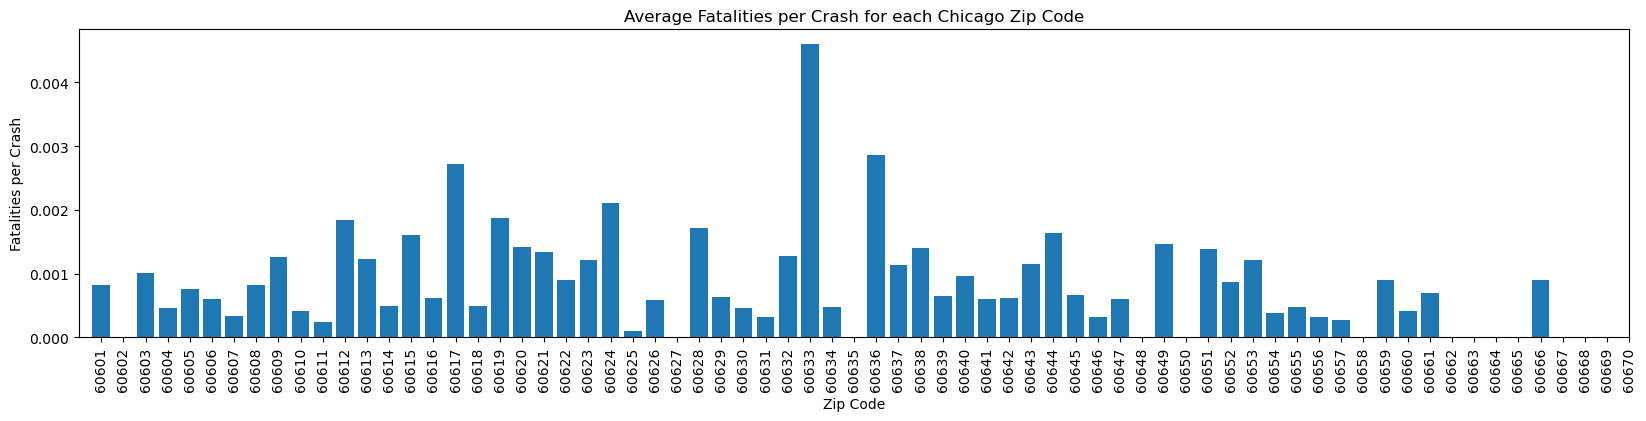

In [121]:
plt.figure(figsize=(20,4))
plt.bar(zip_count.index,zip_mean["Fatal Injuries"])
plt.xticks(np.arange(60601,60671, 1.0),rotation = 90)
plt.xlim([60600,60670])
plt.ylabel("Fatalities per Crash")
plt.xlabel("Zip Code")
plt.title("Average Fatalities per Crash for each Chicago Zip Code")
plt.show()

In [144]:
f = []
for zipcode in range(60601,60670):
    f.append(test_df[test_df["Zip Code"] == zipcode]["Fatal Injuries"].dropna())
len(f)

69

In [145]:
g = []
for zipcode in f:
    if len(zipcode) > 0:
        g.append(zipcode)
len(g)

57

In [146]:
st.f_oneway(g[0],g[1],g[2],g[3],g[4],g[5],g[6],g[7],g[8],g[9],
            g[10],g[11],g[12],g[13],g[14],g[15],g[16],g[17],g[18],g[19],
            g[20],g[21],g[22],g[23],g[24],g[25],g[26],g[27],g[28],g[29],
            g[30],g[31],g[32],g[33],g[34],g[35],g[36],g[37],g[38],g[39],
            g[40],g[41],g[42],g[43],g[44],g[45],g[46],g[47],g[48],g[49],
            g[50],g[51],g[52],g[53],g[54],g[55],g[56])

F_onewayResult(statistic=6.898008520728168, pvalue=7.509136611877201e-51)

# Population vs Number of Crashes

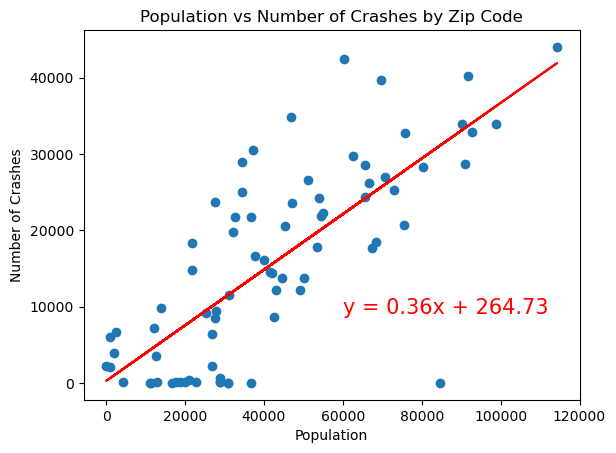

The p-value is: 1.3946045694790988e-15 < 0.05 -> Data is correlated
The r-value is: 0.7615070715119674 -> Strength: Strong


In [159]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population"],zip_count["Posted Speed Limit"])
regress_values = zip_med["Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(zip_med["Population"],zip_count["Posted Speed Limit"])
plt.plot(zip_med["Population"],regress_values,"r-")
plt.annotate(line_eq,(60000,9000),fontsize=15,color="red")
plt.xlabel("Population")
plt.ylabel("Number of Crashes")
plt.title("Population vs Number of Crashes by Zip Code")
plt.show()
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue} -> Strength: Strong')

# Population vs Average Injuries

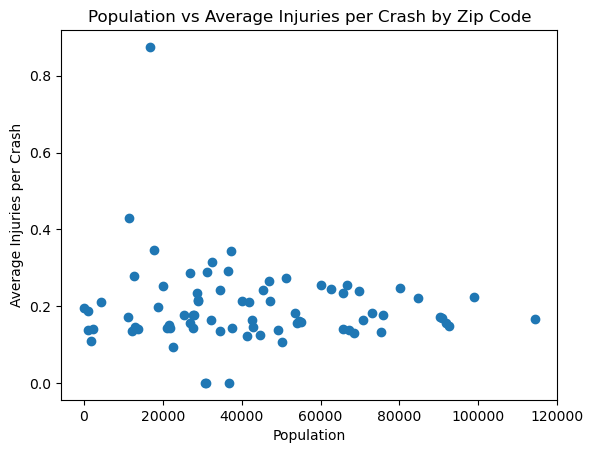

The p-value is: 0.44017144496842 >= 0.05 -> Data is uncorrelated
The r-value is: -0.08985327413375488


In [38]:
plt.scatter(zip_med["Population"],zip_mean["Total Injuries"])
plt.xlabel("Population")
plt.ylabel("Average Injuries per Crash")
plt.title("Population vs Average Injuries per Crash by Zip Code")
plt.show()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population"],zip_mean["Total Injuries"])
regress_values = zip_med["Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

# Population vs Average Severe (+ Fatal) Injuries

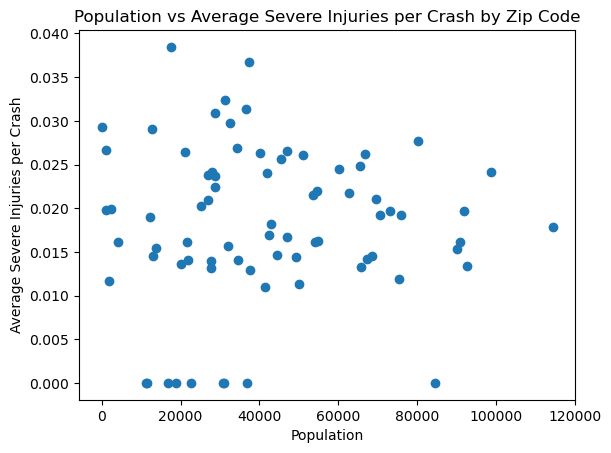

The p-value is: 0.7701405061061055 >= 0.05 -> Data is uncorrelated
The r-value is: 0.03407156366140485


In [39]:
plt.scatter(zip_med["Population"],zip_mean["Severe + Fatal"])
plt.xlabel("Population")
plt.ylabel("Average Severe Injuries per Crash")
plt.title("Population vs Average Severe Injuries per Crash by Zip Code")
plt.show()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population"],zip_mean["Severe + Fatal"])
regress_values = zip_med["Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

# Population vs Average Fatalities

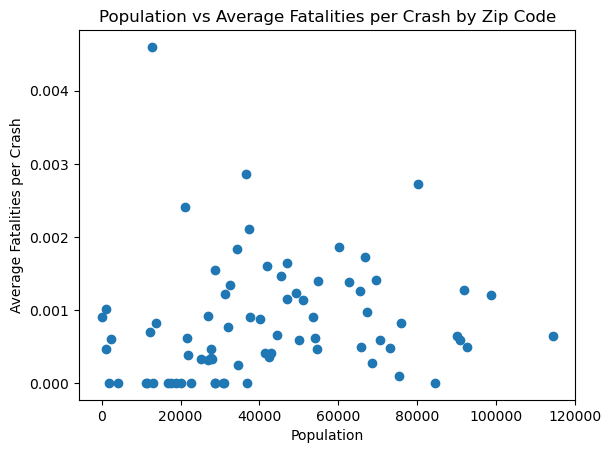

The p-value is: 0.23397389608924857 >= 0.05 -> Data is uncorrelated
The r-value is: 0.13815739778881342


In [40]:
plt.scatter(zip_med["Population"],zip_mean["Fatal Injuries"])
plt.xlabel("Population")
plt.ylabel("Average Fatalities per Crash")
plt.title("Population vs Average Fatalities per Crash by Zip Code")
plt.show()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population"],zip_mean["Fatal Injuries"])
regress_values = zip_med["Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

# Population Density vs Number of Crashes

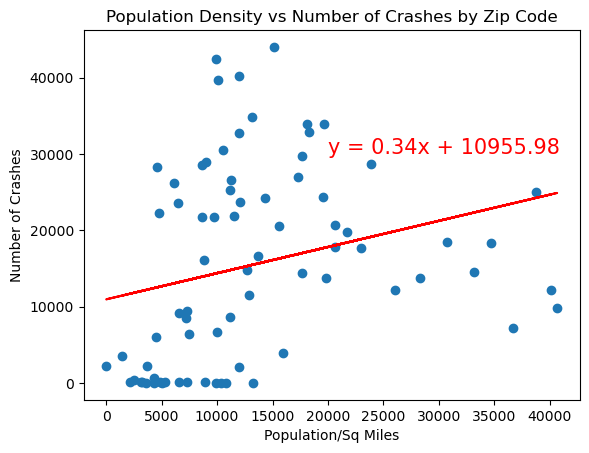

The p-value is: 0.02323435167315031 < 0.05 -> Data is correlated
The r-value is: 0.2601478291338802 -> Strength: Negligible


In [41]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population/Sq Miles"],zip_count["Posted Speed Limit"])
regress_values = zip_med["Population/Sq Miles"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(zip_med["Population/Sq Miles"],zip_count["Posted Speed Limit"])
plt.plot(zip_med["Population/Sq Miles"],regress_values,"r-")
plt.annotate(line_eq,(20000,30000),fontsize=15,color="red")
plt.xlabel("Population/Sq Miles")
plt.ylabel("Number of Crashes")
plt.title("Population Density vs Number of Crashes by Zip Code")
plt.show()
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue} -> Strength: Negligible')

# Population Density vs Average Injuries

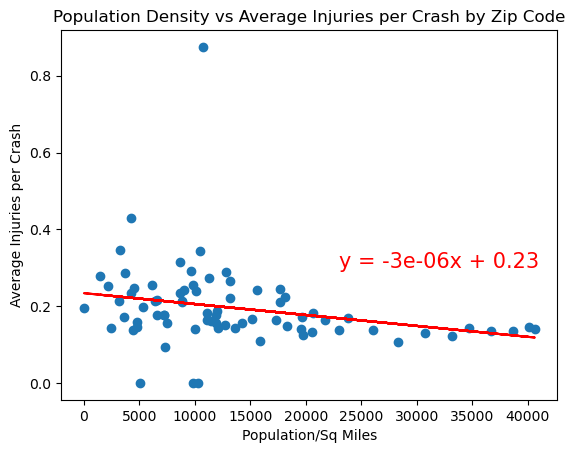

The p-value is: 0.026981025452993888 < 0.05 -> Data is correlated
The r-value is: -0.2537473379459933 -> Strength: Negligible


In [42]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population/Sq Miles"],zip_mean["Total Injuries"])
regress_values = zip_med["Population/Sq Miles"] * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(zip_med["Population/Sq Miles"],zip_mean["Total Injuries"])
plt.plot(zip_med["Population/Sq Miles"],regress_values,"r-")
plt.annotate(line_eq,(23000,0.3),fontsize=15,color="red")
plt.xlabel("Population/Sq Miles")
plt.ylabel("Average Injuries per Crash")
plt.title("Population Density vs Average Injuries per Crash by Zip Code")
plt.show()
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue} -> Strength: Negligible')

# Population Density vs Average Severe (+ Fatal) Injuries

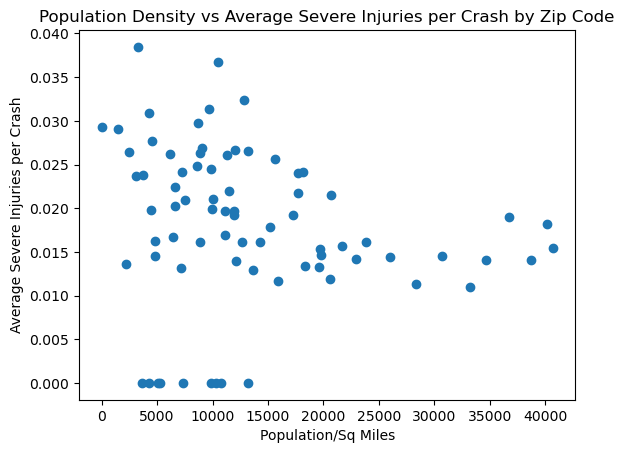

The p-value is: 0.16164372820582992 >= 0.05 -> Data is uncorrelated
The r-value is: -0.16216384334534267


In [43]:
plt.scatter(zip_med["Population/Sq Miles"],zip_mean["Severe + Fatal"])
plt.xlabel("Population/Sq Miles")
plt.ylabel("Average Severe Injuries per Crash")
plt.title("Population Density vs Average Severe Injuries per Crash by Zip Code")
plt.show()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population/Sq Miles"],zip_mean["Severe + Fatal"])
regress_values = zip_med["Population/Sq Miles"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

# Population Density vs Average Fatalities

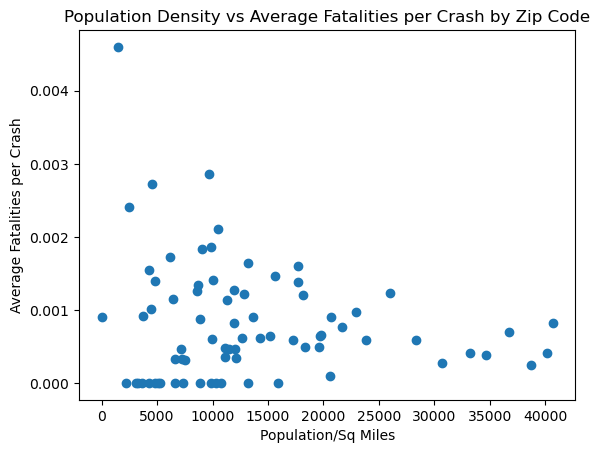

The p-value is: 0.17476647385546634 >= 0.05 -> Data is uncorrelated
The r-value is: -0.1572998596532615


In [44]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_med["Population/Sq Miles"],zip_mean["Fatal Injuries"])
regress_values = zip_med["Population/Sq Miles"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(zip_med["Population/Sq Miles"],zip_mean["Fatal Injuries"])
plt.xlabel("Population/Sq Miles")
plt.ylabel("Average Fatalities per Crash")
plt.title("Population Density vs Average Fatalities per Crash by Zip Code")
plt.show()
if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

# Number of cars in Accident

In [45]:
crashgroup = test_df.groupby(["Crash Record ID"])
crash_count = crashgroup.count()

In [46]:
numcars=crash_count["Posted Speed Limit"].value_counts()
sta = {17:0}
sts = pd.Series(data=sta,index=[17])
numcars = numcars.append(sts)
numcars = numcars.sort_index()
numcars

C:\Users\Connor Thomas\AppData\Local\Temp\ipykernel_8740\166976184.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numcars = numcars.append(sts)


1     196826
2     432021
3      28830
4       6167
5       1434
6        453
7        129
8         70
9         24
10        14
11         6
12         5
13         2
14         2
15         1
16         2
17         0
18         1
dtype: int64

In [47]:
fiveplus = 0
for i in range(5,len(numcars)+1):
    try:
        fiveplus += numcars[i]
    except KeyError:
        print(i,"oops no value!")
        continue
fiveplus

2143

In [48]:
fp = pd.Series(numcars[0:4])
fp["5+"] = fiveplus
fp

1     196826
2     432021
3      28830
4       6167
5+      2143
dtype: int64

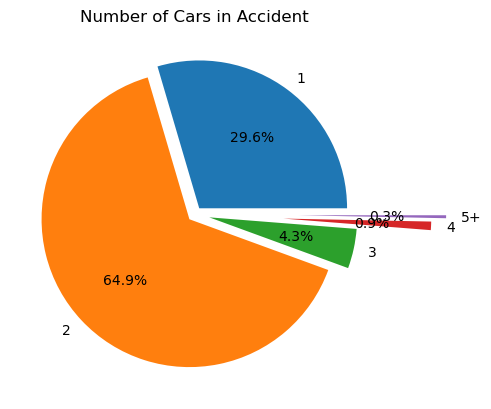

5     1434
6      453
7      129
8       70
9       24
10      14
11       6
12       5
13       2
14       2
15       1
16       2
17       0
18       1
dtype: int64


In [49]:
fp.plot(kind="pie", autopct='%1.1f%%',explode=[0.05,0.05,0.1,0.6,0.7])
plt.ylabel("")
plt.title("Number of Cars in Accident")
plt.show()
print(numcars[4:])

# Vehicle Makes Analysis

In [50]:
car_df = car_df.replace({"Make":{"TOYOTA MOTOR COMPANY, LTD.":"TOYOTA","KIA MOTORS CORP":"KIA",
                                "TESLA MOTORS":"TESLA", 
                                "GENERAL MOTORS CORP.":"GMC",
                                 "GENERAL MOTORS CORPORATION (GMC)": "GMC",
                                "LINCOLN-CONTINENTAL":"LINCOLN",
                                "ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)":"ACURA",
                                }})

In [130]:
car_makes=['CHEVROLET', 'FORD', 'NISSAN', 'HONDA', 'TOYOTA', 'DODGE', 'HYUNDAI', 'JEEP', 'VOLKSWAGEN', 'CHRYSLER', 'BUICK', 'LEXUS', 'TESLA'] 
makes_df=car_df.loc[car_df["Make"].isin(car_makes)]
makes_df.head()

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,TOYOTA,CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,TOYOTA,4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,TOYOTA,CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
6,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"


In [52]:
make_group = makes_df.groupby("Make")

In [53]:
make_mean = make_group.mean()
make_count = makes_df["Make"].value_counts()
make_count = make_count.sort_index()

# Crashes

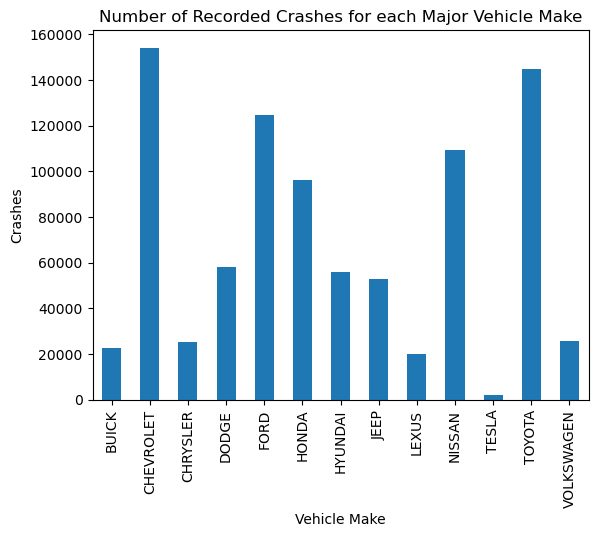

In [54]:
make_count.plot(kind="bar")
plt.xlabel("Vehicle Make")
plt.ylabel("Crashes")
plt.title("Number of Recorded Crashes for each Major Vehicle Make")
plt.show()

# Injuries

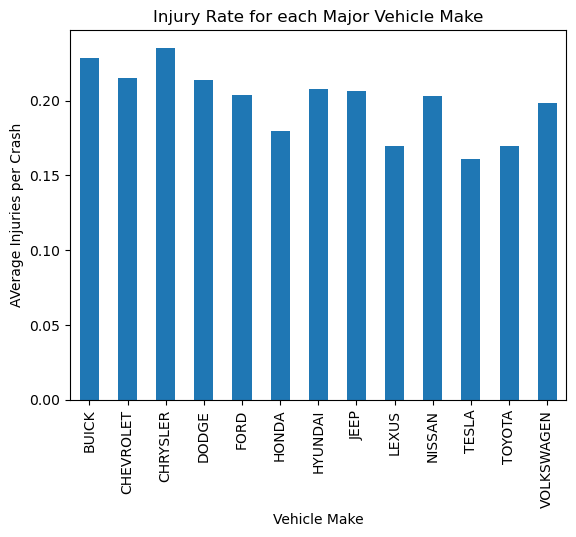

In [55]:
make_mean["Total Injuries"].plot(kind="bar")
plt.xlabel("Vehicle Make")
plt.ylabel("AVerage Injuries per Crash")
plt.title("Injury Rate for each Major Vehicle Make")
plt.show()

In [135]:
group0 = test_df[test_df["Make"] == "BUICK"]["Total Injuries"].dropna()
group1 = test_df[test_df["Make"] == "CHEVROLET"]["Total Injuries"].dropna()
group2 = test_df[test_df["Make"] == "CHRYSLER"]["Total Injuries"].dropna()
group3 = test_df[test_df["Make"] == "DODGE"]["Total Injuries"].dropna()
group4 = test_df[test_df["Make"] == "FORD"]["Total Injuries"].dropna()
group5 = test_df[test_df["Make"] == "HONDA"]["Total Injuries"].dropna()
group6 = test_df[test_df["Make"] == "HYUNDAI"]["Total Injuries"].dropna()
group7 = test_df[test_df["Make"] == "JEEP"]["Total Injuries"].dropna()
group8 = test_df[test_df["Make"] == "LEXUS"]["Total Injuries"].dropna()
group9 = test_df[test_df["Make"] == "NISSAN"]["Total Injuries"].dropna()
group10 = test_df[test_df["Make"] == "TESLA"]["Total Injuries"].dropna()
group11 = test_df[test_df["Make"] == "TOYOTA"]["Total Injuries"].dropna()
group12 = test_df[test_df["Make"] == "VOLKSWAGEN"]["Total Injuries"].dropna()

In [138]:
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=32.78775839303238, pvalue=9.637845702995783e-77)

# Fatalities

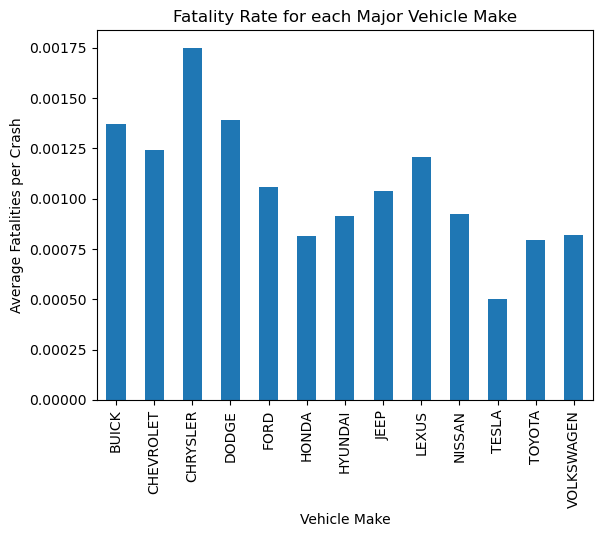

In [56]:
make_mean["Fatal Injuries"].plot(kind="bar")
plt.xlabel("Vehicle Make")
plt.ylabel("Average Fatalities per Crash")
plt.title("Fatality Rate for each Major Vehicle Make")
plt.show()

In [133]:
group0 = test_df[test_df["Make"] == "BUICK"]["Fatal Injuries"].dropna()
group1 = test_df[test_df["Make"] == "CHEVROLET"]["Fatal Injuries"].dropna()
group2 = test_df[test_df["Make"] == "CHRYSLER"]["Fatal Injuries"].dropna()
group3 = test_df[test_df["Make"] == "DODGE"]["Fatal Injuries"].dropna()
group4 = test_df[test_df["Make"] == "FORD"]["Fatal Injuries"].dropna()
group5 = test_df[test_df["Make"] == "HONDA"]["Fatal Injuries"].dropna()
group6 = test_df[test_df["Make"] == "HYUNDAI"]["Fatal Injuries"].dropna()
group7 = test_df[test_df["Make"] == "JEEP"]["Fatal Injuries"].dropna()
group8 = test_df[test_df["Make"] == "LEXUS"]["Fatal Injuries"].dropna()
group9 = test_df[test_df["Make"] == "NISSAN"]["Fatal Injuries"].dropna()
group10 = test_df[test_df["Make"] == "TESLA"]["Fatal Injuries"].dropna()
group11 = test_df[test_df["Make"] == "TOYOTA"]["Fatal Injuries"].dropna()
group12 = test_df[test_df["Make"] == "VOLKSWAGEN"]["Fatal Injuries"].dropna()

In [134]:
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=2.317755808334123, pvalue=0.0058916529625800155)

# Vehicle Year Analysis

In [57]:
yearlist = car_df["Vehicle Year"].unique()
yearlist = np.delete(yearlist, np.where(yearlist == 'UNKNOWN'))
yearlist = np.delete(yearlist, np.where((yearlist < 1960)|(yearlist > 2025)))
yearlist = np.sort(yearlist)
yearlist

array([1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0,
       1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0,
       1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0,
       1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0,
       1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
       2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
       2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0,
       2024.0, 2025.0], dtype=object)

In [58]:
year_df=car_df.loc[car_df["Vehicle Year"].isin(yearlist)]

In [59]:
year_counts = year_df["Vehicle Year"].value_counts().sort_index()
year_counts

1960.0        3
1961.0        3
1962.0        2
1963.0        6
1964.0       11
          ...  
2021.0    16391
2022.0     6991
2023.0      721
2024.0        4
2025.0        3
Name: Vehicle Year, Length: 66, dtype: int64

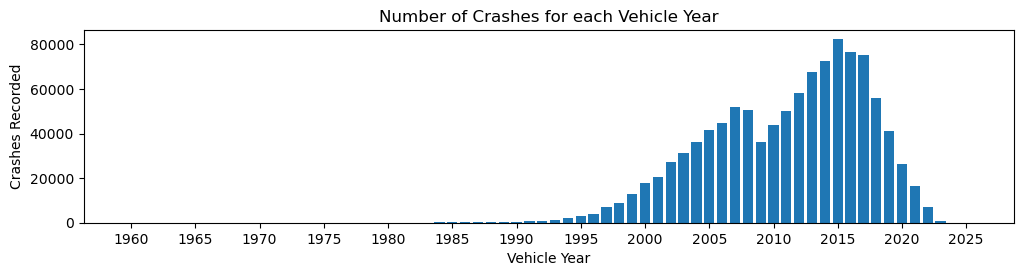

In [153]:
plt.figure(figsize=(12,2.5))
plt.bar(year_counts.index,year_counts)
plt.xticks(np.arange(1960,2026, 5.0))
plt.ylabel("Crashes Recorded")
plt.xlabel("Vehicle Year")
plt.title("Number of Crashes for each Vehicle Year")
plt.show()

In [61]:
year_group = year_df.groupby("Vehicle Year")
year_mean = year_group.mean()

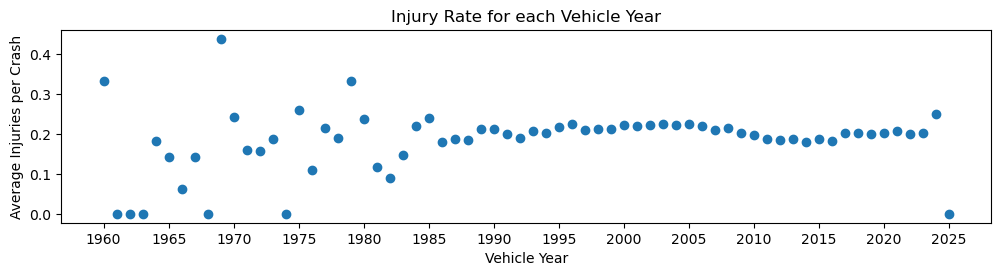

The p-value is: 0.07386381101661355 >= 0.05 -> Data is uncorrelated
The r-value is: 0.22151084064328216


In [152]:
plt.figure(figsize=(12,2.5))
plt.scatter(year_mean.index,year_mean["Total Injuries"])
plt.xticks(np.arange(1960,2026, 5.0))
plt.xlabel("Vehicle Year")
plt.ylabel("Average Injuries per Crash")
plt.title("Injury Rate for each Vehicle Year")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(year_mean.index,year_mean["Total Injuries"])

if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')

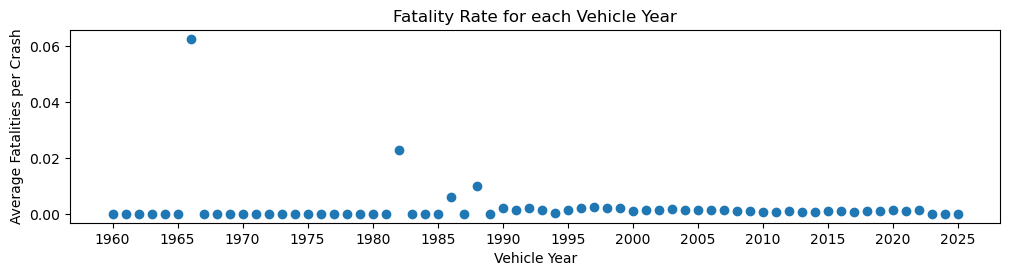

The p-value is: 0.24560999113795054 >= 0.05 -> Data is uncorrelated
The r-value is: -0.14493194454669697


In [154]:
plt.figure(figsize=(12,2.5))
plt.scatter(year_mean.index,year_mean["Fatal Injuries"])
plt.xticks(np.arange(1960,2026, 5.0))
plt.xlabel("Vehicle Year")
plt.ylabel("Average Fatalities per Crash")
plt.title("Fatality Rate for each Vehicle Year")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(year_mean.index,year_mean["Fatal Injuries"])

if pvalue < 0.05:
    print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
else:
    print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
print(f'The r-value is: {rvalue}')